In [1]:
import numpy as np
import pandas as pd
from Replayers import ABTestReplayer, EpsilonGreedyReplayer, ThompsonSamplingReplayer


In [2]:
#rating_df = pd.read_csv('ratings_Electronics.csv')
rating_df= pd.read_csv('ratings_Electronics.csv',nrows=500)
rating_df.columns = ['user_id', 'product_id', 'rating', 'rating_time']
rating_df.to_csv("output/file.csv", index=False)
print(rating_df.shape[0])
rating_df.head()


500


,user_id,product_id,rating,rating_time
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [3]:
reward_threshold = 4
rating_df['reward'] = rating_df.eval('rating > @reward_threshold').astype(int)
rating_df.head()

,user_id,product_id,rating,rating_time,reward
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800,1
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600,0
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200,0
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200,0
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600,1


In [4]:
n_visits = 2000
n_iterations = 10
reward_history = rating_df
item_col_name = 'product_id'
visitor_col_name = 'user_id'
reward_col_name = 'reward'


In [5]:
n_test_visits = 200
ABtest_results = ABTestReplayer(n_visits, n_test_visits, reward_history,
                               item_col_name, visitor_col_name, reward_col_name,
                               n_iterations=n_iterations).replay()


100%|██████████| 10/10 [4:16:44<00:00, 1540.48s/it]  


In [6]:
ABtest_results_df = pd.DataFrame(ABtest_results)
ABtest_results_df.head()
ABtest_results_df.to_csv('output/ABtest2k.csv')


In [7]:
n_test_visits = 500
ABtest5k_results = ABTestReplayer(n_visits, n_test_visits, reward_history,
                               item_col_name, visitor_col_name, reward_col_name,
                               n_iterations=n_iterations).replay()

100%|██████████| 10/10 [6:07:08<00:00, 2202.89s/it] 


In [8]:
ABtest5k_results_df = pd.DataFrame(ABtest5k_results)
ABtest5k_results_df.head()
ABtest5k_results_df.to_csv('output/ABtest5k.csv')

In [9]:
epsilon = 0.10
epsilon_results = EpsilonGreedyReplayer(epsilon, n_visits, reward_history,
                                           item_col_name, visitor_col_name, reward_col_name,
                                           n_iterations=n_iterations).replay()


100%|██████████| 10/10 [2:17:15<00:00, 823.51s/it] 


In [10]:
epsilon_results_df = pd.DataFrame(epsilon_results)
epsilon_results_df.head()
epsilon_results_df.to_csv('output/epsilon.csv')

In [11]:
thompson_results = ThompsonSamplingReplayer(n_visits, reward_history,
                                            item_col_name, visitor_col_name, reward_col_name,
                                            n_iterations=n_iterations).replay()

100%|██████████| 10/10 [6:52:49<00:00, 2477.00s/it] 


In [12]:
thompson_results_df = pd.DataFrame(thompson_results)
thompson_results_df.head()
thompson_results_df.to_csv('output/thompson_sampling.csv')

In [13]:
ABtest_results_df=ABtest_results_df.groupby('visit', as_index=False).mean()
ABtest5k_results_df=ABtest5k_results_df.groupby('visit', as_index=False).mean()
epsilon_results_df=epsilon_results_df.groupby('visit', as_index=False).mean()
thompson_results_df=thompson_results_df.groupby('visit', as_index=False).mean()

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(font_scale=2.5)

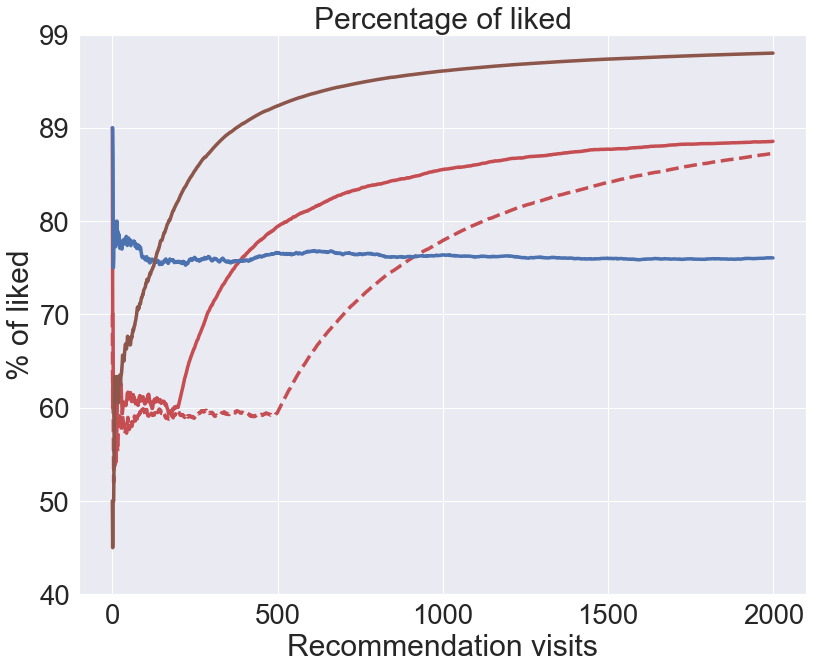

In [19]:
fig, ax = plt.subplots(figsize=(12,10))
for (avg_results_df, style) in [(ABtest_results_df, 'r-'),
                                (ABtest5k_results_df, 'r--'),
                                (epsilon_results_df, 'b-'),
                                (thompson_results_df, 'tab:brown')]:
    
    ax.plot(avg_results_df.visit, avg_results_df.fraction_relevant, style, linewidth=3.5)

ax.set_title('Percentage of liked')
ax.set_xlabel('Recommendation visits')
ax.set_ylabel('% of liked')

ax.set_xticks(range(0,2200,500))
ax.set_ylim(0.4, 1.0)
ax.set_yticks(np.arange(0.4, 1.1, 0.1))
ax.set_yticklabels((ax.get_yticks()*100).astype(int))
plt.tight_layout()
plt.show()